# GEOMETRIC CV LAB - 01 (112201022)

### imports

In [1]:
import numpy as np
import cv2
from PIL import Image

print("OpenCV version:", cv2.__version__)
print("Pillow (PIL) is working:", isinstance(Image.new('RGB', (10, 10)), Image.Image))

OpenCV version: 4.12.0
Pillow (PIL) is working: True


### Read the two images (image1.jpg & image2.jpg). What are the sizes of the matrices?

In [2]:
img1 = cv2.imread("image1.jpg")
img2 = cv2.imread("image2.jpg")

## Sizes of Matrices

In [17]:
print("img1 size", img1.shape)
print("img2 size", img2.shape)

img1 size (300, 300, 3)
img2 size (300, 300, 3)


In [4]:
# Check if images are loaded correctly
if img1 is None :
    print('img1 could not be loaded. Check file paths.')
elif img2 is None:
    print("img2 couldn't be loaded. Check file paths.")
else:
    cv2.imshow("Image 1", img1)
    cv2.imshow("Image 2", img2)

    cv2.waitKey(0)            # Wait for any key press
    cv2.destroyAllWindows()   # Close all OpenCV windows


### The original image pixel values are in integer format. Find the minimum and maximum values. Normalize the pixels to a range of 0 to 1 with double precision format.

In [5]:
def channel_retrival(img, channel):
    return img[:,:,channel]

In [6]:
def pixel_retrival(img, i, j):
    return img[i][j]

In [7]:
def func(img, channel, extreme):
    if (extreme == -1):
        return np.min(channel_retrival(img, channel))
    elif (extreme == 1):
        return np.max(channel_retrival(img, channel))
    else:
        "Choose either extreme as -1 for min value and 1 for max value in the channel"

In [8]:
images = [img1, img2]
channels = [0, 1, 2]
extremes = [-1, 1]

def find_min_max(images, channels, extremes):
    global_min = float('inf')
    global_max = float('-inf')

    for index, img in enumerate(images):
        for channel in channels:
            for extreme in extremes:
                value = func(img, channel, extreme)
                print(f"img{index+1} with channel {channel} with {'max_value' if extreme == 1 else 'min_value'}: {value}")
                
                if extreme == -1:
                    global_min = min(global_min, value)
                else:
                    global_max = max(global_max, value)

    return global_min, global_max


In [19]:
find_min_max(images, channels, extremes)

img1 with channel 0 with min_value: 0
img1 with channel 0 with max_value: 255
img1 with channel 1 with min_value: 0
img1 with channel 1 with max_value: 243
img1 with channel 2 with min_value: 0
img1 with channel 2 with max_value: 255
img2 with channel 0 with min_value: 16
img2 with channel 0 with max_value: 236
img2 with channel 1 with min_value: 16
img2 with channel 1 with max_value: 236
img2 with channel 2 with min_value: 16
img2 with channel 2 with max_value: 236


(np.uint8(0), np.uint8(255))

In [10]:
normalise_img1 = img1/255.0
normalise_img2 = img2/255.0

### Add the two images together and renormalize the values.

In [11]:

new_normalise_img = (normalise_img1 + normalise_img2)/2.0
new_normalise_img

array([[[0.49803922, 0.60980392, 0.62745098],
        [0.48235294, 0.59019608, 0.60784314],
        [0.51372549, 0.61372549, 0.63333333],
        ...,
        [0.55098039, 0.61372549, 0.61176471],
        [0.54117647, 0.60980392, 0.60196078],
        [0.51960784, 0.58823529, 0.58039216]],

       [[0.5       , 0.61176471, 0.62941176],
        [0.51372549, 0.62156863, 0.63921569],
        [0.53529412, 0.63529412, 0.65490196],
        ...,
        [0.5372549 , 0.60392157, 0.60196078],
        [0.5372549 , 0.60588235, 0.59803922],
        [0.54509804, 0.61764706, 0.60980392]],

       [[0.5254902 , 0.64117647, 0.65882353],
        [0.52352941, 0.63529412, 0.65294118],
        [0.50196078, 0.60588235, 0.6254902 ],
        ...,
        [0.49803922, 0.57058824, 0.5627451 ],
        [0.45686275, 0.52941176, 0.52156863],
        [0.47058824, 0.54901961, 0.53921569]],

       ...,

       [[0.49411765, 0.5       , 0.45686275],
        [0.51372549, 0.51960784, 0.47058824],
        [0.50392157, 0

### Rescale the values to a range of 0 to 255 and save the final image.

In [12]:
new_img = new_normalise_img*255
new_img

array([[[127. , 155.5, 160. ],
        [123. , 150.5, 155. ],
        [131. , 156.5, 161.5],
        ...,
        [140.5, 156.5, 156. ],
        [138. , 155.5, 153.5],
        [132.5, 150. , 148. ]],

       [[127.5, 156. , 160.5],
        [131. , 158.5, 163. ],
        [136.5, 162. , 167. ],
        ...,
        [137. , 154. , 153.5],
        [137. , 154.5, 152.5],
        [139. , 157.5, 155.5]],

       [[134. , 163.5, 168. ],
        [133.5, 162. , 166.5],
        [128. , 154.5, 159.5],
        ...,
        [127. , 145.5, 143.5],
        [116.5, 135. , 133. ],
        [120. , 140. , 137.5]],

       ...,

       [[126. , 127.5, 116.5],
        [131. , 132.5, 120. ],
        [128.5, 128.5, 116.5],
        ...,
        [ 89. ,  92. ,  94.5],
        [ 81.5,  84.5,  87. ],
        [ 61. ,  64. ,  66.5]],

       [[132. , 133.5, 121. ],
        [134.5, 136. , 123.5],
        [131. , 130. , 118. ],
        ...,
        [ 88. ,  92. ,  95.5],
        [ 81. ,  85. ,  88.5],
        [ 60.5,

In [13]:
new_img_uint8 = new_img.astype(np.uint8)
new_img_uint8

array([[[127, 155, 160],
        [123, 150, 155],
        [131, 156, 161],
        ...,
        [140, 156, 156],
        [138, 155, 153],
        [132, 150, 147]],

       [[127, 156, 160],
        [131, 158, 163],
        [136, 162, 167],
        ...,
        [137, 154, 153],
        [137, 154, 152],
        [139, 157, 155]],

       [[134, 163, 168],
        [133, 162, 166],
        [128, 154, 159],
        ...,
        [127, 145, 143],
        [116, 135, 133],
        [120, 140, 137]],

       ...,

       [[126, 127, 116],
        [131, 132, 120],
        [128, 128, 116],
        ...,
        [ 89,  92,  94],
        [ 81,  84,  87],
        [ 61,  64,  66]],

       [[131, 133, 121],
        [134, 136, 123],
        [131, 130, 118],
        ...,
        [ 88,  92,  95],
        [ 81,  85,  88],
        [ 60,  64,  68]],

       [[133, 134, 121],
        [135, 135, 123],
        [127, 127, 114],
        ...,
        [ 88,  92,  96],
        [ 80,  84,  88],
        [ 60,  64,  68]]

In [14]:
cv2.imshow("Final Image", new_img_uint8)  # Display image in a window
cv2.waitKey(0)                            # Wait indefinitely until a key is pressed
cv2.destroyAllWindows()                  # Close all OpenCV windows

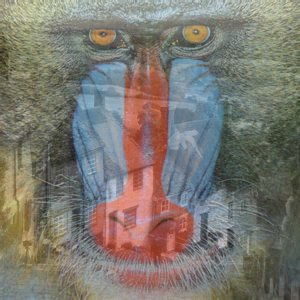

In [15]:
new_img_rgb = cv2.cvtColor(new_img_uint8, cv2.COLOR_BGR2RGB)
img_final = Image.fromarray(new_img_rgb)
# img_pil.show()
display(img_final)

### Saving the final image


In [16]:
img_final.save("final_combined_image.png")